# K Nearest Neighbors

Dieses Notebook dient als Code Referenz zur Video-Lektion über die "K Nearest Neighbors" (K Nächsten Nachbarn). Der Code wurde aus dem ISLR Buch adoptiert.

## Die Daten laden

Wir werden das ISLR Package verwenden, um Daten zu erhalten. Du kannst es ggf. noch downloaden. Denke auf jeden Fall daran, die Library aufzurufen.

In [1]:
# install.packages('ISLR')

In [2]:
library(ISLR)

Wir werden den KNN Ansatz auf den "Caravan" Datensatz anwenden. Dieser ist Teil der ISLR Library. Dieser Datensatz schließt 85 Eigenschaften für insgesamt 8.522 Individuen ein. Sie geben demographische Daten an. Die Ergebnisvariable ist `Purchase`, was angibt, ob ein Individuum eine Versicherung für seinen Wohnwagen gekauft hat oder nicht. In diesem Datensatz haben nur 6% der Leute eine solche Versicherung gekauft.

Schauen wir uns die Struktur an:

In [3]:
str(Caravan)

'data.frame':	5822 obs. of  86 variables:
 $ MOSTYPE : num  33 37 37 9 40 23 39 33 33 11 ...
 $ MAANTHUI: num  1 1 1 1 1 1 2 1 1 2 ...
 $ MGEMOMV : num  3 2 2 3 4 2 3 2 2 3 ...
 $ MGEMLEEF: num  2 2 2 3 2 1 2 3 4 3 ...
 $ MOSHOOFD: num  8 8 8 3 10 5 9 8 8 3 ...
 $ MGODRK  : num  0 1 0 2 1 0 2 0 0 3 ...
 $ MGODPR  : num  5 4 4 3 4 5 2 7 1 5 ...
 $ MGODOV  : num  1 1 2 2 1 0 0 0 3 0 ...
 $ MGODGE  : num  3 4 4 4 4 5 5 2 6 2 ...
 $ MRELGE  : num  7 6 3 5 7 0 7 7 6 7 ...
 $ MRELSA  : num  0 2 2 2 1 6 2 2 0 0 ...
 $ MRELOV  : num  2 2 4 2 2 3 0 0 3 2 ...
 $ MFALLEEN: num  1 0 4 2 2 3 0 0 3 2 ...
 $ MFGEKIND: num  2 4 4 3 4 5 3 5 3 2 ...
 $ MFWEKIND: num  6 5 2 4 4 2 6 4 3 6 ...
 $ MOPLHOOG: num  1 0 0 3 5 0 0 0 0 0 ...
 $ MOPLMIDD: num  2 5 5 4 4 5 4 3 1 4 ...
 $ MOPLLAAG: num  7 4 4 2 0 4 5 6 8 5 ...
 $ MBERHOOG: num  1 0 0 4 0 2 0 2 1 2 ...
 $ MBERZELF: num  0 0 0 0 5 0 0 0 1 0 ...
 $ MBERBOER: num  1 0 0 0 4 0 0 0 0 0 ...
 $ MBERMIDD: num  2 5 7 3 0 4 4 2 1 3 ...
 $ MBERARBG: num  5 0 0 

In [4]:
summary(Caravan$Purchase)

No  Yes 
5474  348

## Daten säubern

Da wir diese Daten nur als einfache Beispiel verwenden werden wir uns nicht mit dem Thema des "Feature Engineering" befassen. Wir sollten nur überprüfen, ob es fehlende Werte gibt.

In [5]:
any(is.na(Caravan))

[1] FALSE

Sieht so aus, als stünden wir bereits gut da. Fahren wir damit fort die Variablen zu standardisieren:

## Variablen standardisieren

Da der KNN Klassifizierer die Klasse eine Testbeobachtung dadurch identifiziert, dass er überprüft, welche Beobachtungen dieser am "nächsten" stehen, ist die Skala der Daten wichtig. Jede Variable mit großer Skale hätte einen viel größeren Einfluss auf den Abstand zwischen den Beobachtungen. Und dadurch auch auf den KNN Klassifizierer. Wir können uns beispielhaft die Varianz zweier Features anschauen:

In [6]:
var(Caravan[,1])

[1] 165.0378

In [7]:
var(Caravan[,2])

[1] 0.1647078

Ganz offensichtlich unterscheiden sich die Skalen wesentlich! Wir sollten alle X Variablen standardisieren und Y (Purchase) dabei außen vor lassen. Die `Purchase` Variable ist in Spalte 86 unseres Datensatzes. Wir sollten sie in eine neue Variable speichern, da die `knn()` Funktion sie als eigenes Argument benötigt.

In [8]:
# Purchase Spalte in eigener Variable speichern
purchase <- Caravan[,86]

# Den Datensatz mit scale() standardisieren
standardized.Caravan <- scale(Caravan[,-86])

Wir können erneut die Varianz überprüfen:

In [9]:
var(standardized.Caravan[,1])

[1] 1

In [10]:
var(standardized.Caravan[,2])

[1] 1

Wir sehen, dass alle unabhängigen Variablen (X's) jetzt einen Durchschnitt von 1 und eine Standardabweichung von 0 haben. Damit können wir gut weiterarbeiten. Wir sollten unsere Daten jetzt in Trainings- und Testdaten aufteilen. Wir teilen dazu einfach die ersten 1000 Zeilen als Testdaten ab:

In [11]:
test.index <- 1:1000
test.data <- standardized.Caravan[test.index,]
test.purchase <- purchase[test.index]

In [12]:
# Rest der Daten zum Training
train.data <- standardized.Caravan[-test.index,]
train.purchase <- purchase[-test.index]

## KNN nutzen
Denke daran, dass wir ein Modell erstellen wollen, um vorherzusagen, ob jemand eine Versicherung kauft oder nicht. Wir werden die `knn()` Funktion verwenden, um dies zu tun. Und wir werden uns auf 4 der Argumente konzentrieren, die wir festlegen müssen.

1. Das erste Argument ist der Dataframe, der die Trainings enthält. 
2. Danach folgt der Dataframe, der die Testdaten enthält.
3. Das dritte Argument ist die train.purchase Spalte, die wir vorher gespeichert haben
4. Zuletzt definieren wir k, die Anzahl an Nachbarn.

Beginnen wir mit k=1. `knn()` erzeugt einen Vektor an vorhergesagten Y's.

In [13]:
library(class)

In [14]:
set.seed(101)
predicted.purchase <- knn(train.data,test.data,train.purchase,k=1)
head(predicted.purchase)

[1] No No No No No No
Levels: No Yes

Jetzt sollten wir das Modell auswerten, das wir trainiert haben und unsere Fehleinteilung anschauen.

In [15]:
mean(test.purchase != predicted.purchase)

[1] 0.116

## Einen k Wert wählen

Schauen wir uns an, was für einen anderen k-Wert passiert:

In [16]:
predicted.purchase <- knn(train.data,test.data,train.purchase,k=3)
mean(test.purchase != predicted.purchase)

[1] 0.073

Interessant! Unsere Fehlerrate ist gesunken. Was passiert bei k=5?

In [17]:
predicted.purchase <- knn(train.data,test.data,train.purchase,k=5)
mean(test.purchase != predicted.purchase)

[1] 0.066

Sollten wir hier wirklich manuell auf die Suche nach einem k-Wert gehen? Nein! Wir haben Computer und können den Prozess automatisieren. Dazu können wir eine for-Schleife verwenden.

Stellen wir uns vor wir wollen k von 1 bis 100 testen. Händisch müssten wir 100 x 3 Zeilen schreiben. Mit einer Schleife brauchen wir nur 4 Zeilen.

In [18]:
predicted.purchase = NULL
error.rate = NULL

for(i in 1:20){
    set.seed(101)
    predicted.purchase = knn(train.data,test.data,train.purchase,k=i)
    error.rate[i] = mean(test.purchase != predicted.purchase)
}

In [19]:
print(error.rate)

 [1] 0.116 0.107 0.074 0.070 0.066 0.064 0.062 0.061 0.058 0.058 0.059 0.058
[13] 0.059 0.059 0.059 0.059 0.059 0.059 0.059 0.059


## Elbow-Methode
Wir können die verschiedenen Errorraten für die k-Werte plotten. Wir sollten einen "Elbow" (dt. Ellbogen) sehen, der uns anzeigt, dass wir keine richtige Verbesserung mehr erreichen, indem wir weitere k's hinzufügen. Das ist ein guter Cut-off Punkt:

In [20]:
library(ggplot2)

In [21]:
k.values <- 1:20

In [22]:
error.df <- data.frame(error.rate,k.values)

In [23]:
error.df

error.rate,k.values
0.116,1
0.107,2
0.074,3
0.070,4
0.066,5
0.064,6
0.062,7
0.061,8
0.058,9
0.058,10


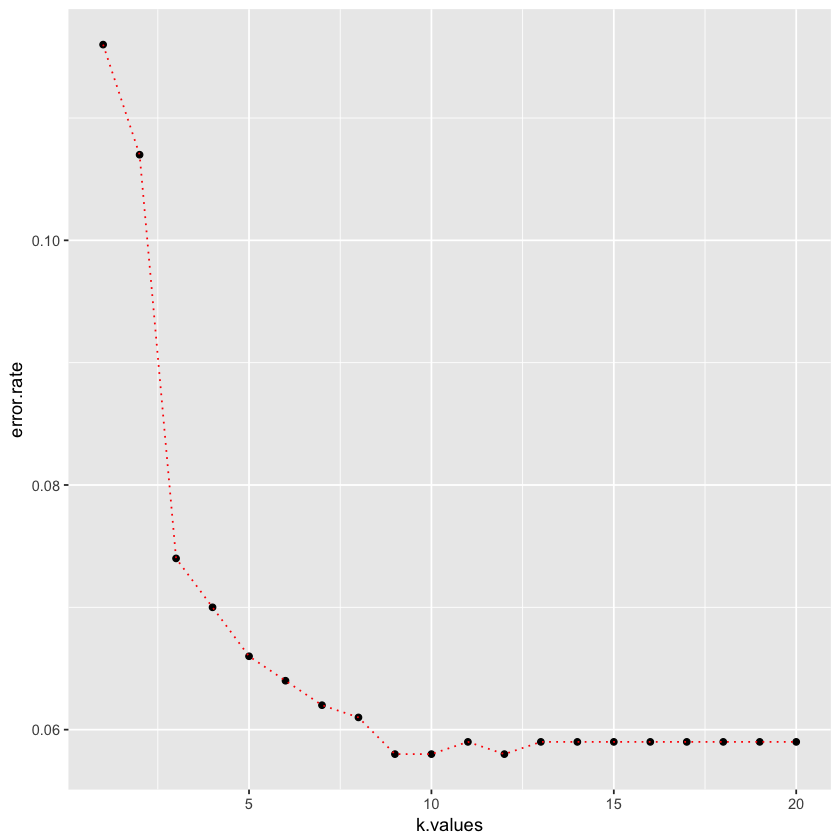

In [24]:
ggplot(error.df,aes(x=k.values,y=error.rate)) + geom_point()+ geom_line(lty="dotted",color='red')

Hier sehen wir sehr schön, dass wir für k>9 keine Verbesserung mehr erhalten. Wir können diesen Wert (k=9) also für unser Modell festlegen.

# Gut gemacht!